<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLatFIAN2021/blob/main/seminar02/MLatFIAN2021_seminar02_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import matplotlib.pyplot as plt

Consider the following toy dataset:

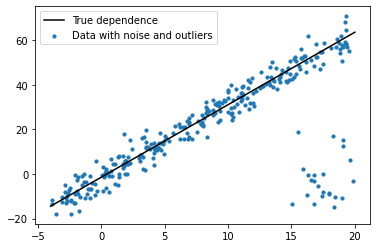

In [39]:
true_function = lambda x: 3.25 * x - 1.47
noize_function = lambda x: (
    np.random.normal(size=len(x)) * 4. +
    np.where(
        x < 15,
        0.,
        -60 + np.random.normal(size=len(x)) * 10
    ) * (np.random.uniform(size=len(x)) < 0.4).astype(int)
)
limits = (-4., 20.)

def generate_dataset(N=300):
  x = np.random.uniform(*limits, size=N)
  y = true_function(x) + noize_function(x)

  return x[:,None], y

X, y = generate_dataset()

x = np.linspace(*limits, 101)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

## Task 1

Implement a linear model $\hat y(x|w) = w_1\cdot x + w_0$ with MAE loss:
$$\text{MAE}(w) = \frac{1}{N}\sum_{i=1}^N\left|y_i - \hat y(x_i|w)\right|,$$
using gradient descent optimization in `numpy`.

*Hint: introduce a constant feature to account for the bias term to make the formulas simpler.*

Plot the learning curve and the final fit. Also, fit the same data with `sklearn`'s `LinearRegression`, and compare the two fits on the same plot. What do you observe? Write a short comment.

## Solution

$$\text{MAE}(w) = \frac{1}{N}\sum_{i=1}^N\left|y_i - w_1 \cdot x_i - w_0\right|,$$

Таким образом, $$\frac{\partial\text{MAE}(w)}{\partial w_1} =  \frac{1}{N}\sum_{i=1}^{N} x_i \cdot sign(y_i - w_1 \cdot x_i - w_0),$$
$$\frac{\partial\text{MAE}(w)}{\partial w_0} =  \frac{1}{N}\sum_{i=1}^{N} sign(y_i - w_1 \cdot x_i - w_0),$$

Работать с двумерным вектором $\vec w$ не буду, рассмотрю отдельно $w_1$ и $w_2$.


100%|██████████| 1000/1000 [00:00<00:00, 23833.57it/s]


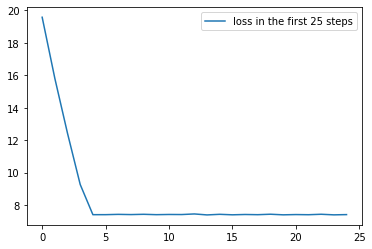

3.1987926185240885 -1.054000000000004


In [128]:
w0,w1 = 0,0
loss_values = []
learning_rate = 0.1
sign = np.zeros(shape = X.shape)

from tqdm import trange
for _ in trange(1000):    
    sign = -(y[:,None]-w1*X-w0)/abs(y[:,None]-w1*X-w0)
    
    w1 -= learning_rate*((sign[:,0]*X[:,0]).mean())
    w0 -= learning_rate*(sign.mean())

    loss_values.append(
          (abs(y[:,None]-w1*X-w0)).mean()
      )

plt.plot(loss_values[:25],label='loss in the first 25 steps')
plt.legend()
plt.show()


print(w1,w0)

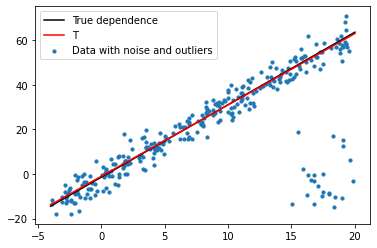

In [129]:
x = np.linspace(*limits, 101)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.plot(x, x*w1+w0, c='red', label='T')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

Предсказание почти идеальное. Посмотрим, к чему приводит линейная регрессия


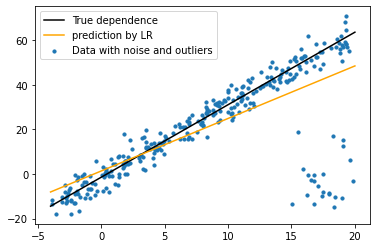

In [125]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)

plt.plot(x, true_function(x), c='black', label='True dependence')
plt.plot(x, model.predict(x[:,None]), c='orange', label='prediction by LR')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

Как мы видим, линейная регрессия даёт предсказание хуже, чем предыдущий вариант. Причём отклонение предсказанной прямой в сторону выбросов. Плохое описание можно объяснить тем, что линейная регрессия минимизирует *MSE*-функцию, в которой суммируются квадраты отклонений, поэтому вклад выбросов больше, чем в *MAE*.
